## Chi-Squared Analysis

### First Question: Did more women and children survive compared to men?

Dataset from canvas (`titanic_passenger_list.csv`)

In [36]:
import pandas as pd

passenger_df = pd.read_csv('../data/Titanic_passengers.csv')

passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


In [38]:
passenger_df.tail(100)

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
1252,"NOEL, Major Gerard Thomas",1856.0,1941.0,55.0,Male,1,died,£3.00,3.0
1253,"DOUTON, Mr William Joseph",1856.0,1912.0,55.0,Male,2,died,£26.00,26.0
1254,"HIPKINS, Mr William Edward",1857.0,1912.0,55.0,Male,1,died,£50.00,50.0
1255,"MOLSON, Mr Harry Markland",1856.0,1912.0,55.0,Male,1,died,£30 10s,30.5
1256,"HAYS, Mr Charles Melville",1856.0,1912.0,55.0,Male,1,died,£93 10s,93.5
...,...,...,...,...,...,...,...,...,...
1347,"FLETCHER, Miss N.",NaN,NaN,NaN,Female,1,died,£1 10s,1.5
1348,"STEVENS, Mr George",NaN,NaN,NaN,Male,1,died,£1 10s,1.5
1349,"CARRUTHERS, Mr Francis",NaN,NaN,NaN,Male,1,died,NaN,NaN
1350,"COLLIS, Mr",NaN,NaN,NaN,Male,1,died,NaN,NaN


- What kind of data is the `dependent` data? (`Survived?`)
  - Nominal

- What kind of data is the `independent` data? (`gender`, `age`)
  - Nominal

Two Types:
  - `Ordinal` data. Data that can be ordered.
  - `Categorical/Nominal` data. Data that can not be ordered.

In [30]:
# margins=True will show the summary
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'], margins=True)
print(contingency_table)

Lived_Died  died  lived   All
Gender                       
Female       143    339   482
Male         709    161   870
All          852    500  1352


<Axes: xlabel='Gender'>

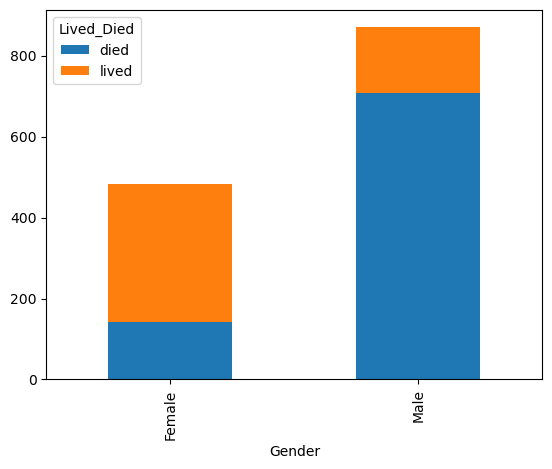

In [31]:
# Task: Create a stacked bar chart showing the number of passengers by gender that lived or died

import matplotlib.pyplot as plt

# Exclude the last column and last row (summary info)
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'])
contingency_table.plot(kind='bar', stacked=True)


In [32]:
from scipy import stats # for chi2_contingency

print(stats.chi2_contingency(contingency_table)[0:3])

# you get 3 values back:
# 1) Chi-Squared: The higher the chi-squared statistic, the less the likelihood that the observed values were the result of pure chance
# 2) Target P-value
# 3) Degrees of freedom: 1 degree of freedom. (rows - 1) * (columns - 1) = 1

(355.24355436145913, 3.0570688722545846e-79, 1)


## Chi-Square: Was Age relevant?

In [49]:
# Check the age column. It is already fixed for the age at the time of the incident.

# Create the bins
passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
contingency_table = pd.crosstab(passenger_df['age_bins'], passenger_df['Lived_Died'])

print(contingency_table)




Lived_Died  died  lived
age_bins               
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0


array([<Axes: title={'center': 'died'}>,
       <Axes: title={'center': 'lived'}>], dtype=object)

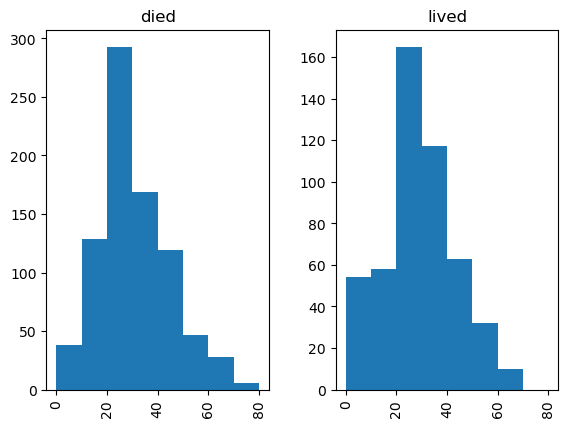

In [46]:
passenger_df.hist(column='Age', bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], by='Lived_Died')

<Axes: ylabel='Frequency'>

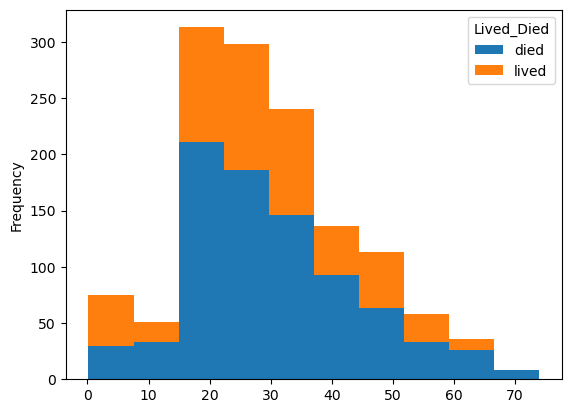

In [48]:
passenger_df.pivot(columns="Lived_Died")["Age"].plot(kind="hist", stacked=True)

In [51]:
# Create a heatmap
passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

# Use a pivot table 

0       (0.0, 10.0]
1       (0.0, 10.0]
2       (0.0, 10.0]
3       (0.0, 10.0]
4       (0.0, 10.0]
           ...     
1347            NaN
1348            NaN
1349            NaN
1350            NaN
1351            NaN
Name: age_bins, Length: 1352, dtype: category
Categories (8, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]
